# PUBLIC TRANSPORT TRIPS EXPLORATORY DATA ANALYSIS

### IMPORT NECESSARY LIBRARIES

In [22]:
# Import pandas library for data manipulation and analysis
import pandas as pd
# Import numpy for numerical operations
import numpy as np
# Import matplotlib's pyplot for creating visualizations
import matplotlib.pyplot as plt
# Import seaborn, a statistical data visualization library built on matplotlib
import seaborn as sns
import missingno as msno

### LOAD THE DATASET

In [23]:
data_df = pd.read_excel('Public_Transport_Trips_EDA.xlsx')

### DATA UNDERSTANDING

In [24]:
# print the top five rows

data_df.head()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,NaN,F
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,NaN,F
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday,NaN,F
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday,NaN,F
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday,NaN,F


In [25]:
# print the bottom five rows

data_df.tail()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
995,TRIP0996,train,North Station,West End,2024-01-01 22:35:00,NaN,40.546670,51.0,2024-02-11,Saturday,NaN,NaN
996,TRIP0997,Bus,Central,West End,2024-01-01 22:36:00,63.0,7.772635,35.0,2024-02-11,Thursday,NaN,NaN
997,TRIP0998,FERRY,West End,North Station,2024-01-01 22:37:00,23.0,NaN,8.0,2024-02-11,Saturday,NaN,NaN
998,TRIP0999,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday,NaN,NaN
999,TRIP1000,train,Airport,West End,2024-01-01 22:39:00,34.0,8.168803,21.0,2024-02-11,Tuesday,NaN,NaN


In [26]:
# check the dimensions of the data

data_df.shape

(1000, 12)

In [27]:
# check the features of the data

data_df.columns

Index(['Trip_ID', 'Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')

In [28]:
# check the dataset for any anomalies and data types

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        900 non-null    float64       
 6   Fare_Amount            900 non-null    float64       
 7   Trip_Duration_Minutes  900 non-null    float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
 10  Unnamed: 10            0 non-null      float64       
 11  Unnamed: 11            299 non-null    object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 93.9+

#### This shows that there are 1000 entries in this dataset, 
- 4 features has float data type,
- 2 features has datetime data types, 
- 6 has object data type
- passenger count, fare amount and trip duration minutes features has missing values
- unnamed:10 and unnamed:11 features will be removed as they are irrelevant to the analysis

In [29]:
# Numerical statistical analysis

data_df.describe()

,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Unnamed: 10
count,1000,900.000000,900.000000,900.000000,1000,0.0
mean,2024-01-01 14:19:30,49.154444,25.360742,94.270000,2024-01-21 08:03:50.400000,NaN
min,2024-01-01 06:00:00,1.000000,0.500576,5.000000,2024-01-01 00:00:00,NaN
25%,2024-01-01 10:09:45,25.000000,12.818196,49.750000,2024-01-11 00:00:00,NaN
50%,2024-01-01 14:19:30,48.000000,25.403856,97.500000,2024-01-21 00:00:00,NaN
75%,2024-01-01 18:29:15,72.000000,37.866623,138.000000,2024-02-01 00:00:00,NaN
max,2024-01-01 22:39:00,99.000000,49.945184,179.000000,2024-02-11 00:00:00,NaN
std,NaN,27.698270,14.464556,50.634982,NaN,NaN


In [30]:
# categorical statistical analysis

data_df.describe(include=['object'])

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Day_of_Week,Unnamed: 11
count,1000,1000,1000,1000,1000,299
unique,1000,9,7,7,7,2
top,TRIP1000,Bus,North Station,South Point,Sunday,F
freq,1,147,171,171,167,250


### REMOVE IRRELEVANT FEATURES

In [31]:
data_df.drop(["Unnamed: 10",'Unnamed: 11'], axis=1, inplace=True)

In [32]:
data_df.head(2)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday


### CHECK EACH FEATURES FOR INCONSISTENCIES IN THE DATA

In [33]:
#data_df['Mode_of_Transport'].unique()
data_df['Departure_Station'].unique()
#data_df['Arrival_Station'].unique()

array(['West End', 'North Station', 'Central', 'Downtown', 'South Point',
       ' Central ', 'Airport'], dtype=object)

In [34]:
# Define columns to standardize
cols_to_clean = ['Mode_of_Transport', 'Departure_Station', 'Arrival_Station']

# Strip whitespace, convert to lowercase, then capitalize
for col in cols_to_clean:
    data_df[col] = data_df[col].str.strip().str.lower().str.capitalize()

# check output
for col in cols_to_clean:
    print(f"Unique values in {col}:")
    print(data_df[col].unique())
    print()


Unique values in Mode_of_Transport:
['Ferry' 'Tram' 'Bus' 'Train']

Unique values in Departure_Station:
['West end' 'North station' 'Central' 'Downtown' 'South point' 'Airport']

Unique values in Arrival_Station:
['Airport' 'Downtown' 'North station' 'Central' 'South point' 'West end']



### HANDLING MISSING VALUES

In [35]:
# Identify missing data

null_data= data_df.isnull().sum()
null_data

Trip_ID                    0
Mode_of_Transport          0
Departure_Station          0
Arrival_Station            0
Departure_Time             0
Passenger_Count          100
Fare_Amount              100
Trip_Duration_Minutes    100
Trip_Date                  0
Day_of_Week                0
dtype: int64

In [36]:
#Identify missing values in percentage

data_df.isnull().mean()*100

Trip_ID                   0.0
Mode_of_Transport         0.0
Departure_Station         0.0
Arrival_Station           0.0
Departure_Time            0.0
Passenger_Count          10.0
Fare_Amount              10.0
Trip_Duration_Minutes    10.0
Trip_Date                 0.0
Day_of_Week               0.0
dtype: float64

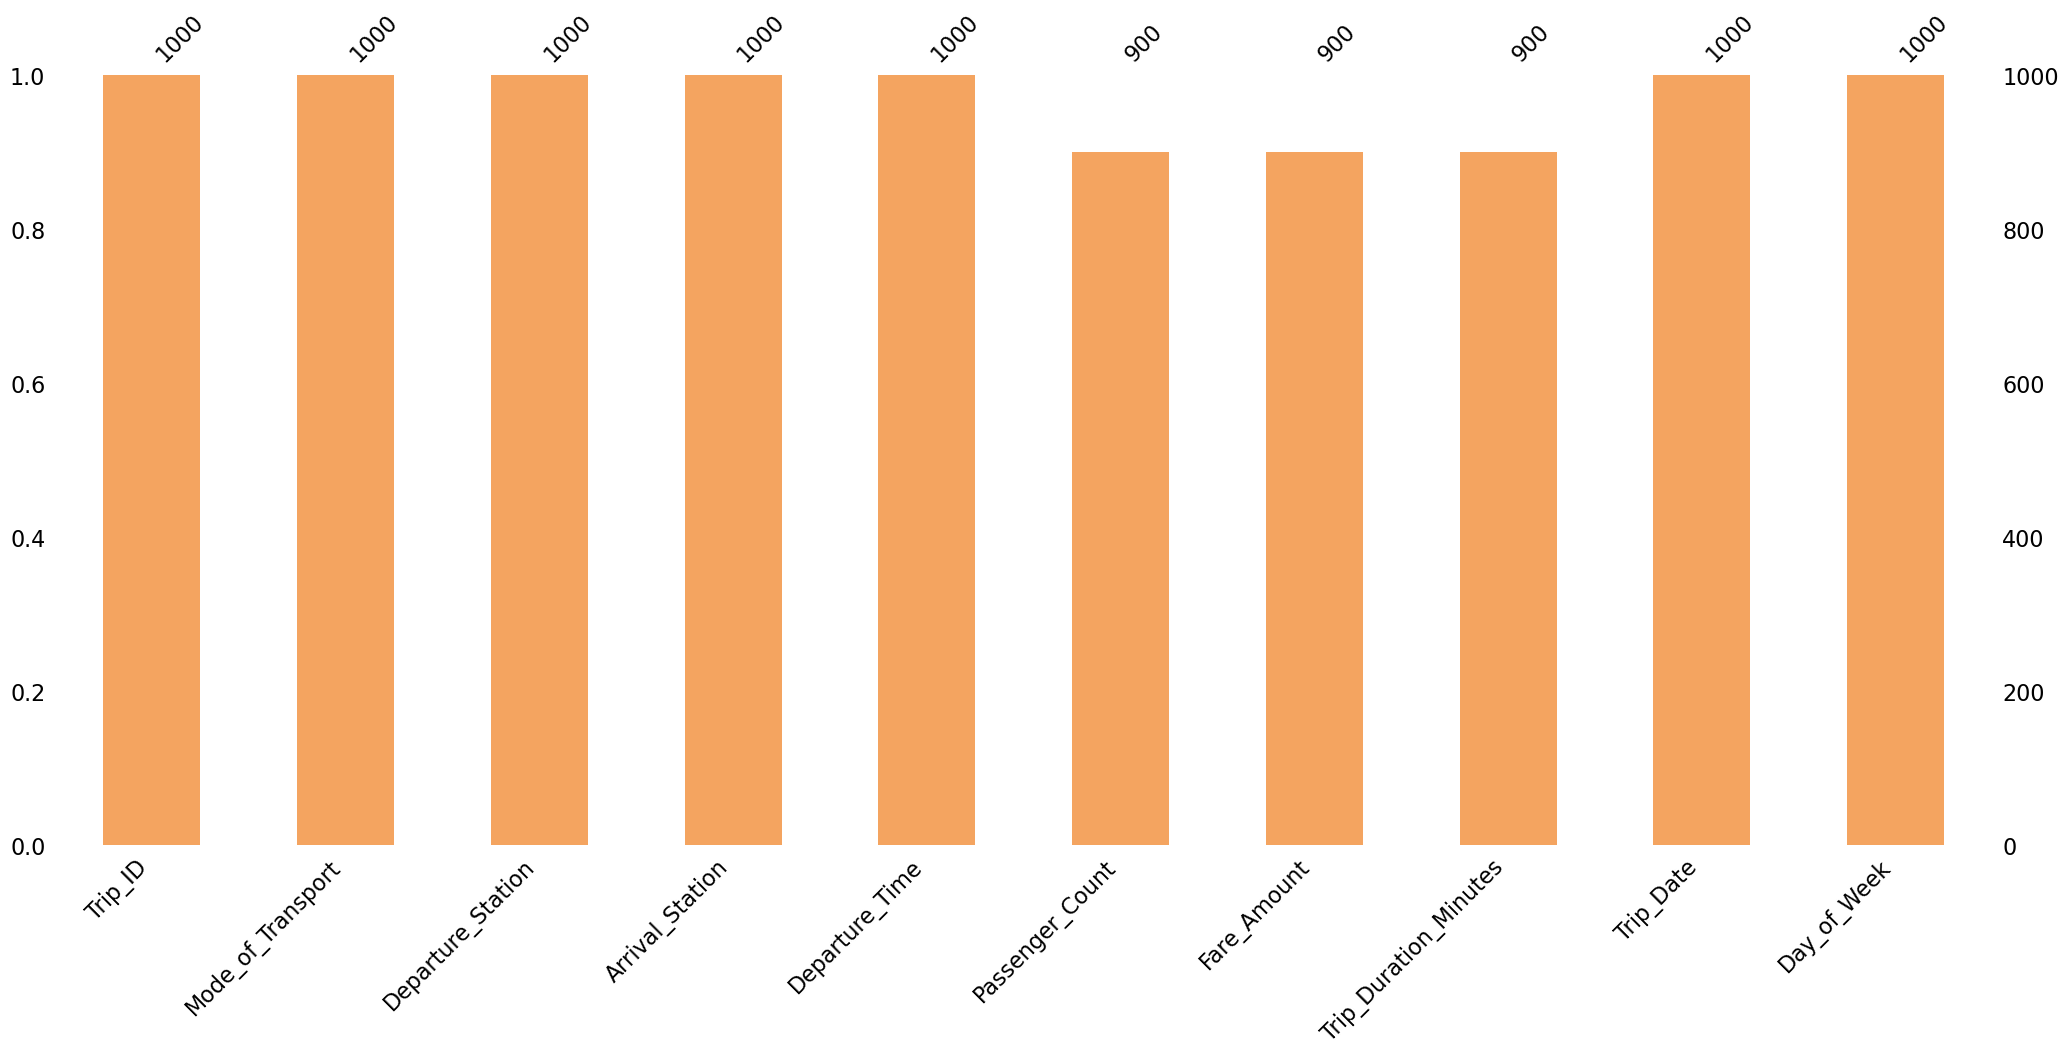

In [37]:
# visualize missing data

plt.figure(figsize=(10,8))
msno.bar(data_df, color='sandybrown');

Bars show how many non-missing vs. missing values exist for each column. Passenger_Count, Fare_Amount, and Trip_Duration_Minutes have noticeable missing values, needs imputation.

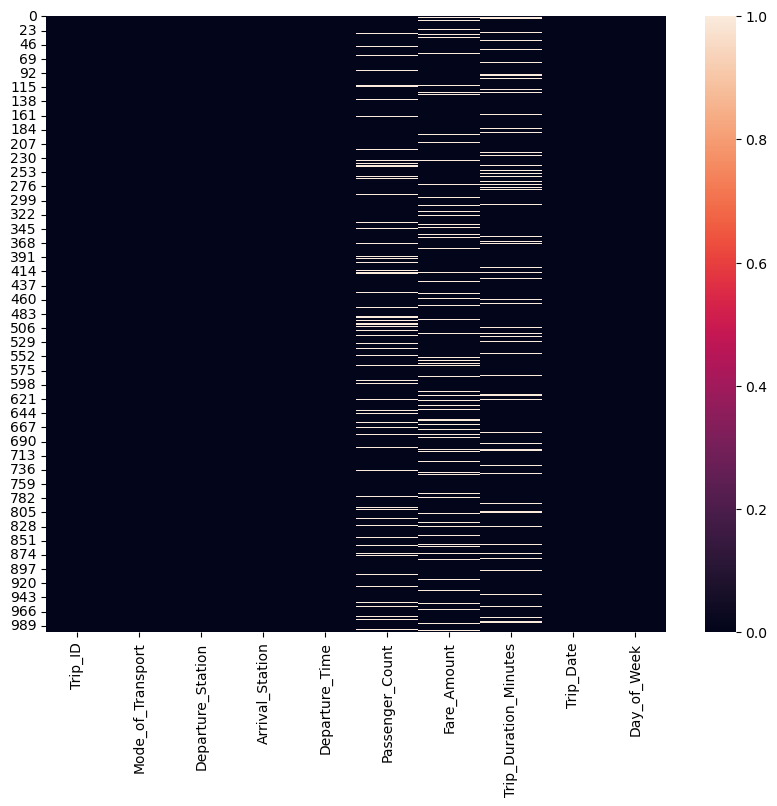

In [38]:
# display columns with missing values using heatmap

plt.figure(figsize=(10,8))
sns.heatmap(data_df.isnull());

In [39]:
data_df.head()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,TRIP0001,Ferry,West end,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,TRIP0002,Tram,North station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday
2,TRIP0003,Bus,Central,North station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday
3,TRIP0004,Ferry,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday


In [40]:
# Impute missing numerical values with median
data_df['Passenger_Count'] = data_df['Passenger_Count'].fillna(data_df['Passenger_Count'].median())
data_df['Fare_Amount'] = data_df['Fare_Amount'].fillna(data_df['Fare_Amount'].median())
data_df['Trip_Duration_Minutes'] = data_df['Trip_Duration_Minutes'].fillna(data_df['Trip_Duration_Minutes'].median())


In [41]:
# Display info about the DataFrame using `info()`

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        1000 non-null   float64       
 6   Fare_Amount            1000 non-null   float64       
 7   Trip_Duration_Minutes  1000 non-null   float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 78.3+ KB


#### This shows that there are 1000 entries in this dataset, 
- 5 features has float data type,
- 2 features has integer data types, 
- 17 has object data type
- postal code feature has missing values
- order date and ship date has incorrect data types

### HANDLING DUPLICATES

In [42]:
# Check for duplicate rows
data_df.duplicated().sum()

np.int64(0)

### HANDLING OUTLIERS

In [43]:
# check for outliers on numerical columns

numerical_cols= data_df.select_dtypes(include='number')

In [44]:
numerical_cols

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes
0,21.0,4.343642,26.0
1,46.0,20.673380,134.0
2,91.0,25.403856,97.5
3,27.0,3.767487,97.5
4,66.0,25.403856,97.5
...,...,...,...
995,48.0,40.546670,51.0
996,63.0,7.772635,35.0
997,23.0,25.403856,8.0
998,9.0,43.300617,169.0


In [45]:
# detect outliers using the IQR method
num_cols = ['Passenger_Count', 'Fare_Amount', 'Trip_Duration_Minutes']

for col in num_cols:
    Q1 = data_df[col].quantile(0.25)
    Q3 = data_df[col].quantile(0.75)
    IQR =Q3-Q1
    lower = Q1 - 1.5 * IQR    
    upper = Q3 - 1.5 * IQR
    outliers= data_df[(data_df[col]< lower)| (data_df[col]> upper)]
    print(f'{col}: {outliers.shape[0]} outliers')

Passenger_Count: 946 outliers
Fare_Amount: 959 outliers
Trip_Duration_Minutes: 949 outliers


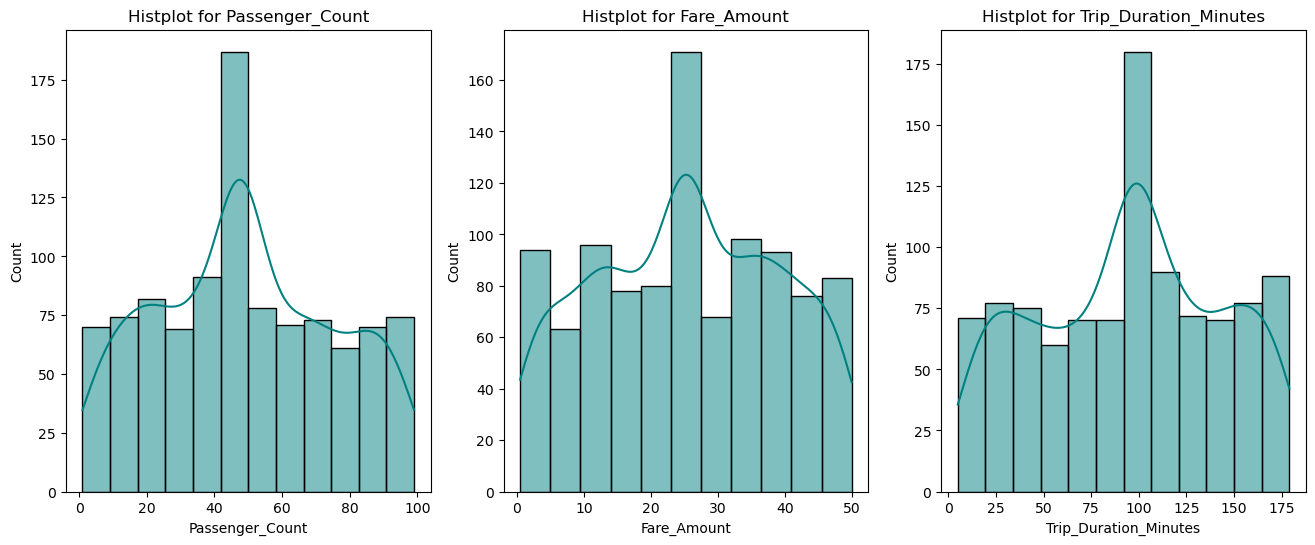

In [46]:
# investigate numerical columns for outliers by visualizing their distribution in histplot

fig, ax = plt.subplots(nrows=1, ncols=3, figsize= (16, 6))

for idx, col in enumerate(numerical_cols):
    sns.histplot(data_df[col], ax=ax[idx], color='teal', kde=True)
    ax[idx]. set_title(f'Histplot for {col}')
plt.show()

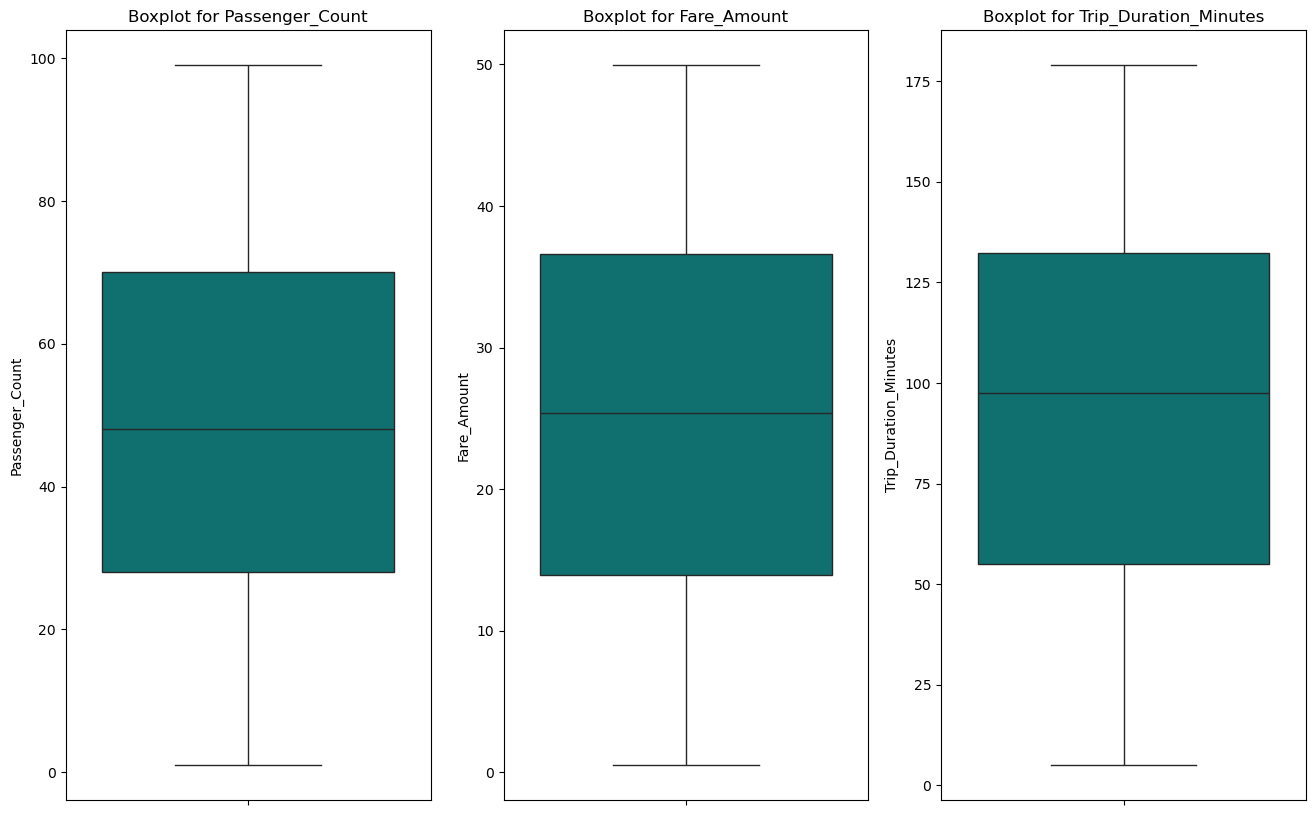

In [47]:
# investigate numerical columns for outliers by visualizing their distribution in boxplot

fig, ax = plt.subplots(nrows=1, ncols=3, figsize= (16, 10))

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data_df[col], ax=ax[idx], color='teal')
    ax[idx]. set_title(f'Boxplot for {col}')
plt.show()

### FEATURE ENGINEERING

In [48]:
data_df['Revenue']= data_df['Passenger_Count']* data_df['Fare_Amount']

data_df["Route"] = data_df["Departure_Station"] + " → " + data_df["Arrival_Station"]

data_df["Fare_per_Passenger"] = data_df["Fare_Amount"] / data_df["Passenger_Count"]

data_df['Hour_of_Day'] = data_df['Departure_Time'].dt.hour

data_df['Day_of_Week'] = data_df['Trip_Date'].dt.day_name()

data_df['Is_Weekend'] = data_df['Trip_Date'].dt.dayofweek >= 5

### BASIC ANALYSIS

### 1. Count the total number of trips

In [49]:
Trips_count= data_df['Trip_ID'].count()

print(f'Total Trips: {Trips_count:,}')

Total Trips: 1,000


### 2. Count the total number of passengers

In [50]:
passenger_count= data_df['Passenger_Count'].sum()

print(f'Total number of passengers: {passenger_count:,}')

Total number of passengers: 49,039.0


### 3. Calculate the total revenue generated

In [51]:
total_revenue = round(data_df['Revenue'].sum(),2)

print(f'Total Revenue: {total_revenue:,}')

Total Revenue: 1,248,668.18


### 4. Calculate the average duration of trips

In [52]:
avg_trips_duration = round(data_df['Trip_Duration_Minutes']. mean(), 2)

print(f'Average duration of trips: {avg_trips_duration:,}')

Average duration of trips: 94.59


## KEY PERFORMANCE INDICATOR

### Total number of trips: 1,000
### Total number of passengers: 49,039.0
### Total Revenue($): 1,248,668.18
### Average duration of trips(minutes): 94.59

# TIME SERIES ANALYSIS

## Passenger Count by Day of Week and Hour of Day

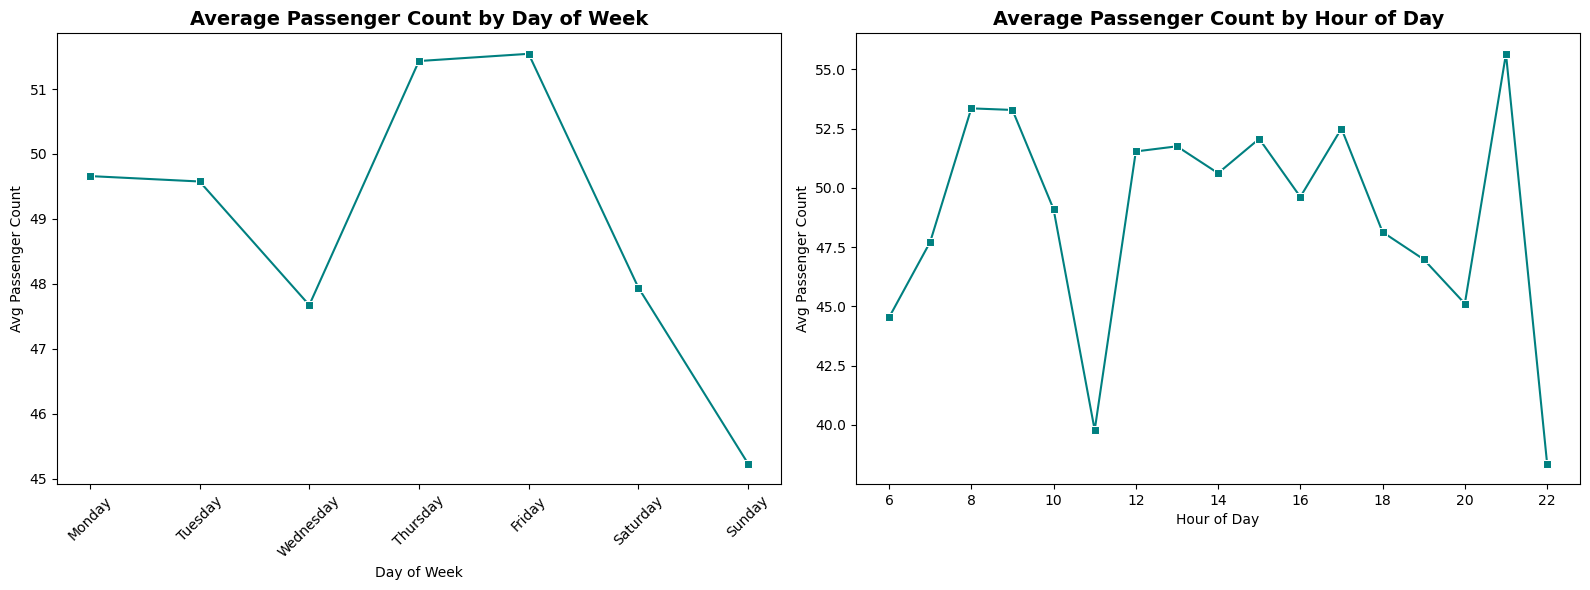

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# a. Passenger Count by Day of Week
sns.lineplot(data=data_df, x="Day_of_Week", y="Passenger_Count", errorbar=None,estimator="mean", ax=axes[0], color='teal', marker='s')
axes[0].set_title("Average Passenger Count by Day of Week", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Day of Week")
axes[0].set_ylabel("Avg Passenger Count")
axes[0].tick_params(axis="x", rotation=45)

# b. Passenger Count by Hour of Day
sns.lineplot(data=data_df, x="Hour_of_Day", y="Passenger_Count", errorbar=None, estimator="mean", ax=axes[1], color= 'teal', marker ='s')
axes[1].set_title("Average Passenger Count by Hour of Day", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Hour of Day")
axes[1].set_ylabel("Avg Passenger Count")

plt.tight_layout()
plt.show()


### INSIGHT:

Passenger demand is commuter-driven, with stable early-week usage, a mid-week surge (Thu–Fri), and sharp weekend drops. Daily patterns show morning peaks (8–9 AM), a mid-day lull, and a stronger evening rush (~9 PM), highlighting concentrated end-of-day travel. These trends mirror revenue flows, pointing to consistent pricing and opportunities to optimize capacity during low-demand periods.


## Average passenger count by day & transport mode

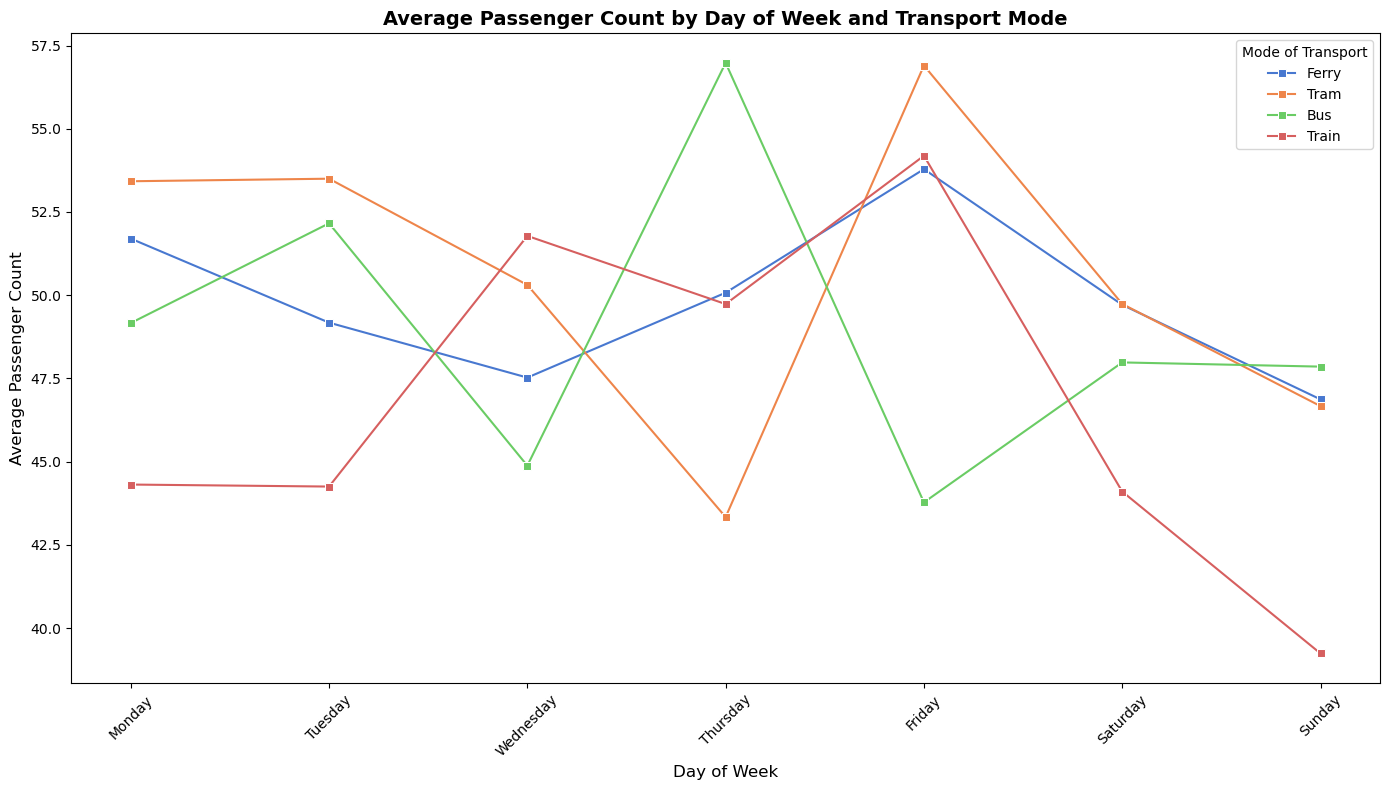

In [54]:
# Barplot of average passenger count by day & transport mode

fig, ax = plt.subplots(figsize=(14, 8))

sns.lineplot(data=data_df, x='Day_of_Week', y='Passenger_Count', hue='Mode_of_Transport', ax=ax, errorbar=None, palette="muted", marker='s')

ax.set_title('Average Passenger Count by Day of Week and Transport Mode', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Average Passenger Count', fontsize=12)
ax.legend(title='Mode of Transport', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### INSIGHT:

Passenger volumes peak mid–late week, with Thursday strongest for Bus and Train and Friday for Ferry and Tram, reflecting end-of-week business and pre-weekend travel. Demand is work-driven, with consistent weekday ridership, sharp weekend declines (especially Train), and minimal leisure travel. This confirms that revenue is primarily tied to commuter patterns rather than weekend usage.

## Passenger Count by Hour & Transport Mode

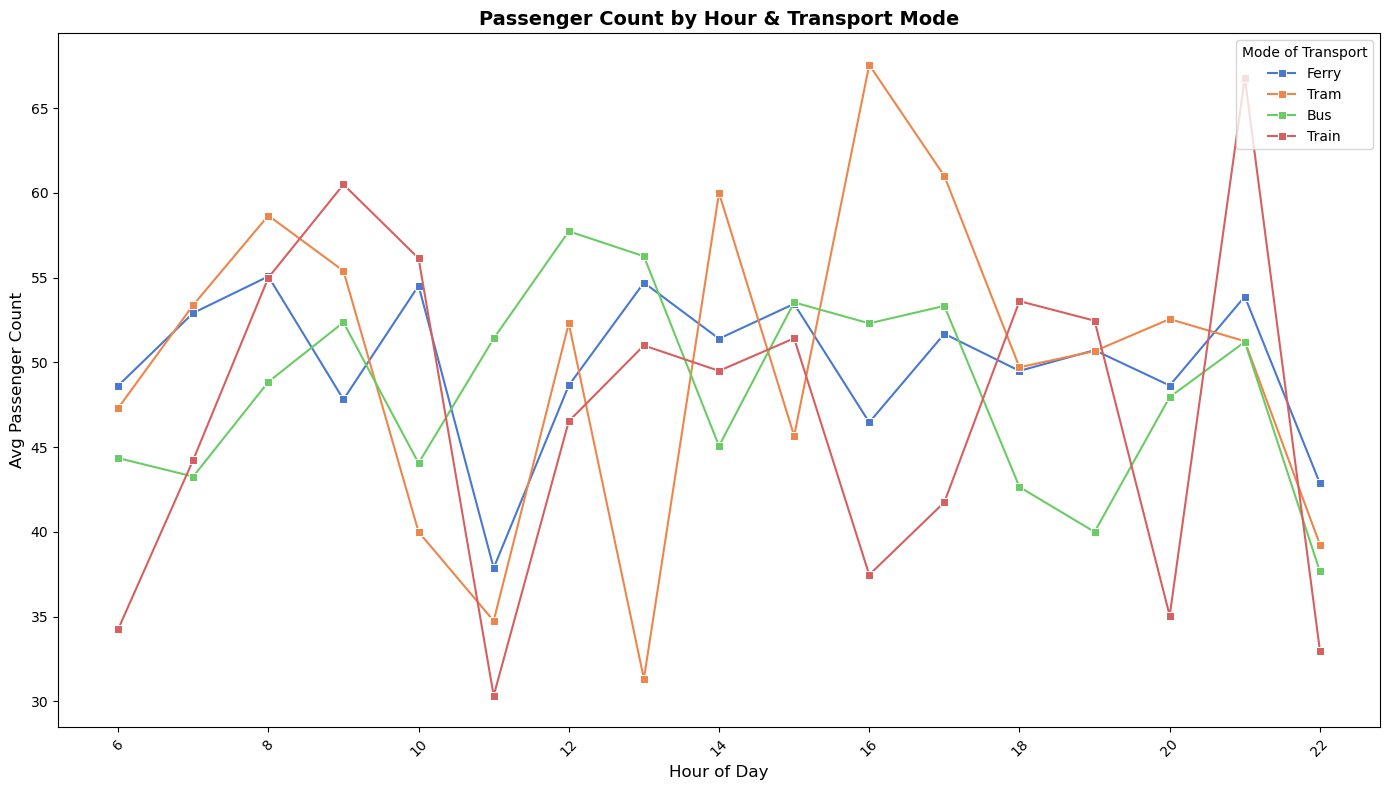

In [55]:
fig, ax = plt.subplots(figsize=(14, 8))
# Lineplot of Passenger Count by Hour & Transport Mode
sns.lineplot(data=data_df, x='Hour_of_Day', y='Passenger_Count', hue='Mode_of_Transport', ax=ax, errorbar=None, palette="muted", marker='s')
# Titles and labels
ax.set_title("Passenger Count by Hour & Transport Mode", fontsize=14, fontweight="bold")
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Avg Passenger Count', fontsize=12)
ax.legend(title='Mode of Transport', loc='upper right')
# Rotate day labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### INSIGHT:

The data shows that different modes serve distinct time-of-day travel needs: Tram dominates the evening rush (18:00), Train follows a dual commuter pattern (9:00 & 21:00), Ferry stays steady throughout the day with modest peaks, and Bus stands out with mid-day strength (12–13:00). Morning commuters rely more on Train and Ferry, mid-day belongs to Bus, while evening is led by Tram and Train.

These complementary usage patterns highlight opportunities to optimize capacity per mode at off-peak times, while Tram’s evening surge may reflect leisure/residential demand and Ferry’s consistency points to stable commuter or tourist flows.

 ## Revenue by Day of Week and Hour of Day

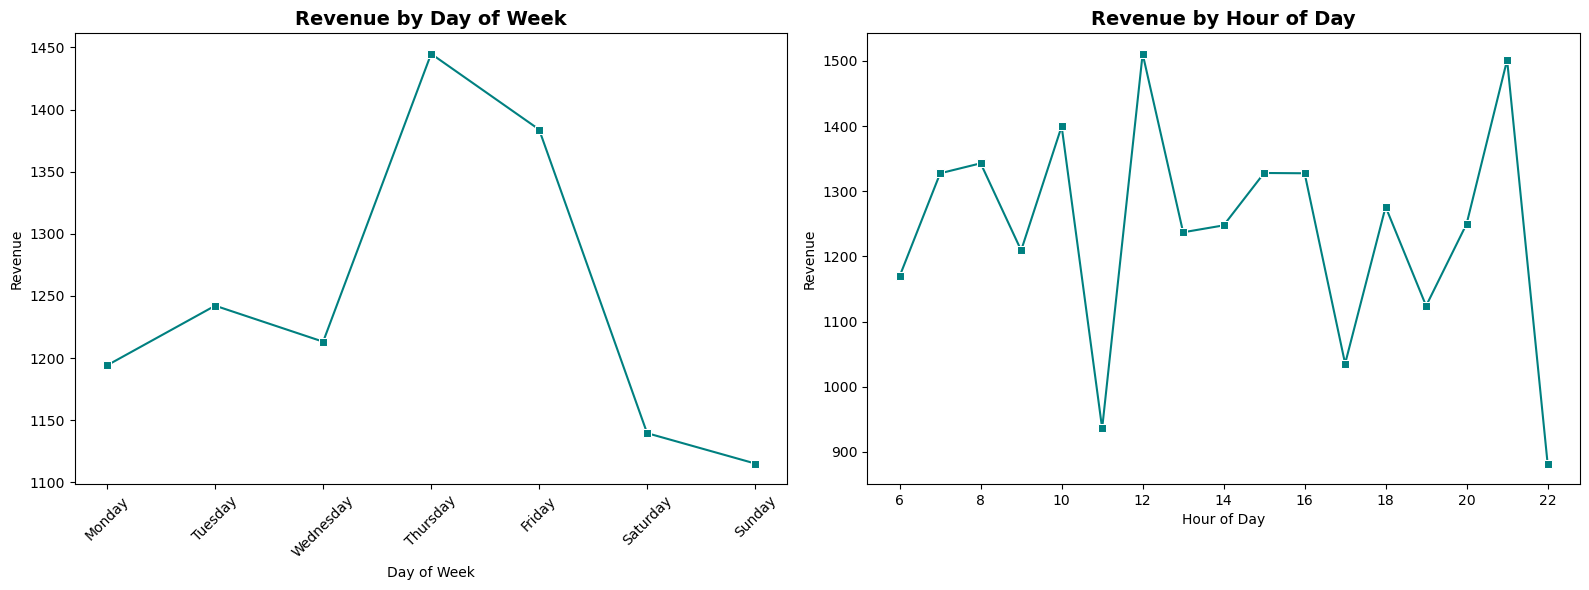

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# a. Revenue by Day of Week
sns.lineplot(data=data_df, x="Day_of_Week", y="Revenue", errorbar=None,estimator="mean", ax=axes[0], marker='s', color='teal')
axes[0].set_title("Revenue by Day of Week", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Day of Week")
axes[0].set_ylabel("Revenue")
axes[0].tick_params(axis="x", rotation=45)

# b. Revenue by Hour of Day
sns.lineplot(data=data_df, x="Hour_of_Day", y="Revenue", errorbar=None, estimator="mean", ax=axes[1], marker ='s', color='teal')
axes[1].set_title("Revenue by Hour of Day", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Hour of Day")
axes[1].set_ylabel("Revenue")

plt.tight_layout()
plt.show()


### INSIGHT:

The analysis shows a business commuter–driven revenue pattern: steady weekdays with a Thursday peak, Friday still strong, but sharp weekend declines. Hourly revenue follows a dual rush-hour cycle (morning build-up, mid-day dip, evening surge peaking at 21:00), reinforcing alignment with traditional work schedules.

Key takeaway: The system primarily serves weekday commuters, with optimization potential in off-peak hours and weekends through pricing or service adjustments, while the Thursday premium likely reflects concentrated business travel demand.

## Revenue by day of week & transport mode

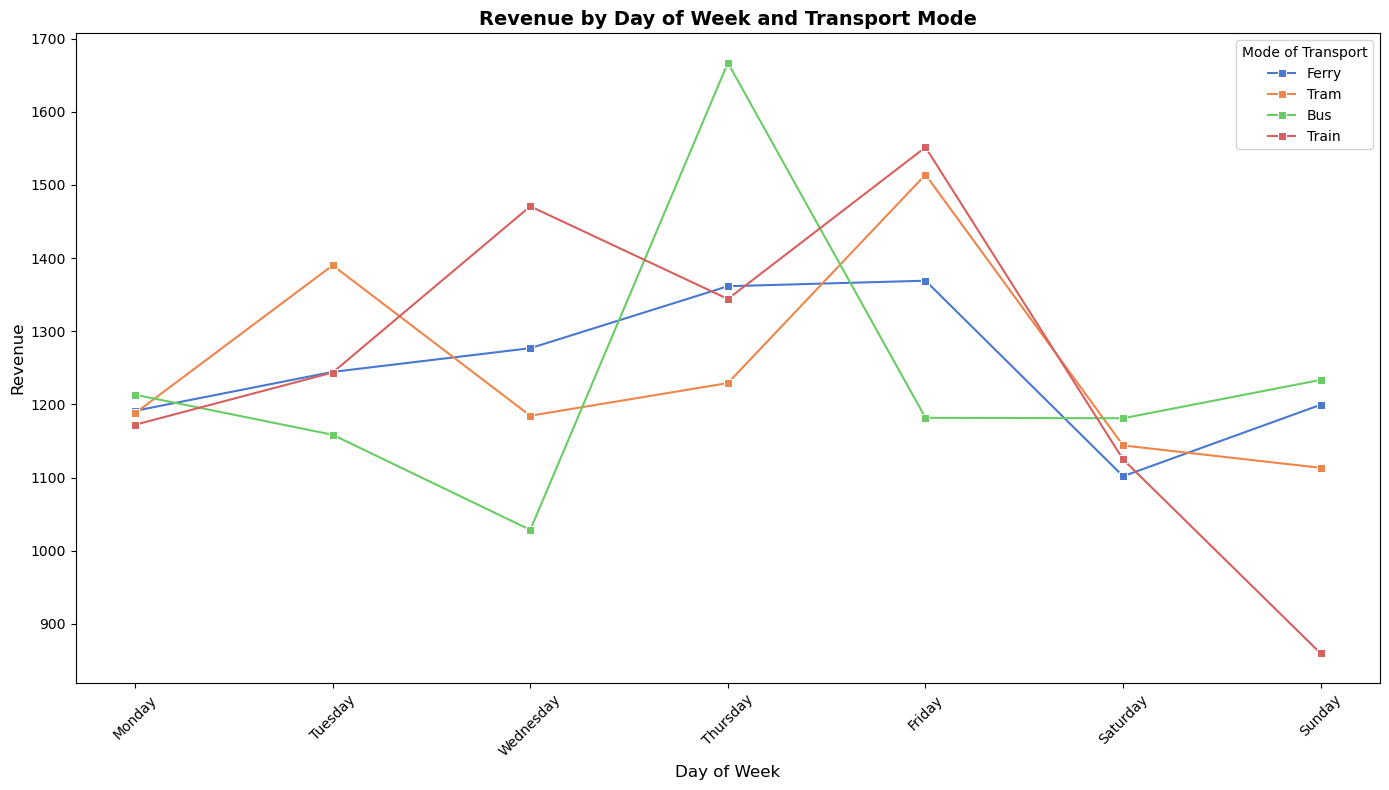

In [57]:
fig, ax = plt.subplots(figsize=(14, 8))

# Barplot of Revenue by day of week & transport mode
sns.lineplot(data=data_df, x='Day_of_Week', y='Revenue', hue='Mode_of_Transport', ax=ax, errorbar=None, palette="muted", marker='s')

# Titles and labels
ax.set_title('Revenue by Day of Week and Transport Mode', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Revenue', fontsize=12)
ax.legend(title='Mode of Transport', loc='upper right')

# Rotate day labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### INSIGHT:

This reveals a weekday-centered revenue cycle: earnings are strongest mid-week especially on Thursday with Bus and Train showing the greatest fluctuations, while Ferry demonstrates the most stability. Weekend revenues consistently decline, most notably for Train and Tram, reflecting the network’s dependence on work-related travel rather than leisure activity.


# UNIVARIATE ANALYSIS

## Distribution of Numerical columns

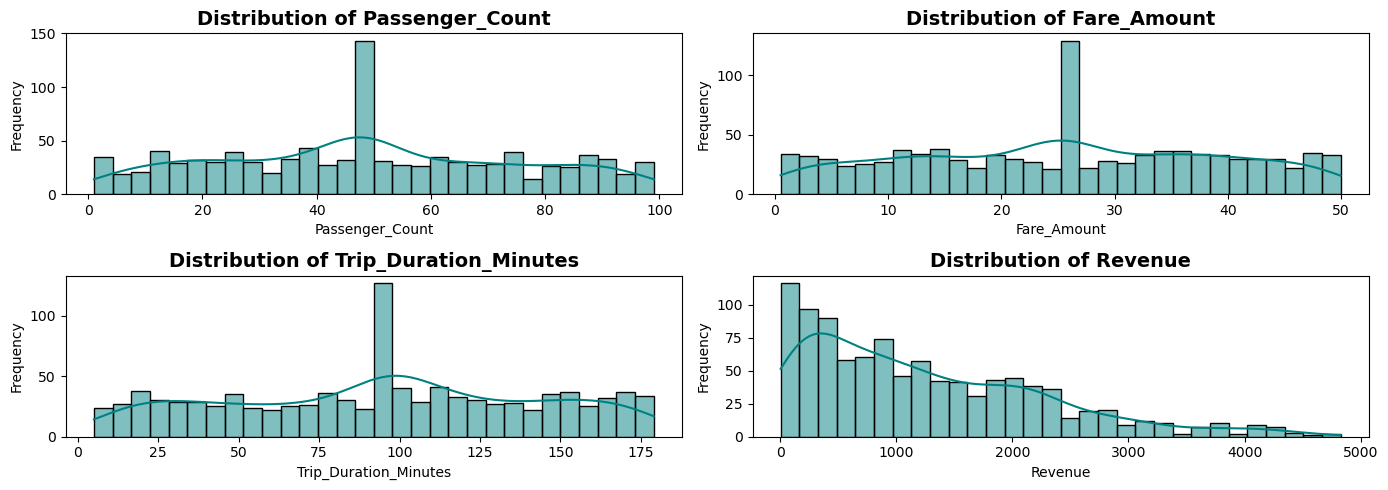

In [58]:
# List of numerical columns
num_cols = ['Passenger_Count', 'Fare_Amount', 'Trip_Duration_Minutes', 'Revenue']

# Set up subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through numerical columns
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.histplot(data_df[col], bins=30, kde=True, ax=ax, color='teal')
    ax.set_title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


### INSIGHT:

Passenger_Count, Fare_Amount, Trip_Duration_Minutes show similar patterns which is relatively uniform base distributions with dominant spikes at specific values frequency of 40-45 passengers, 25-30 fare units and 100 minutes respectively, suggesting standardized service offerings or route types while Revenue is rightly skewed probably because more trips are very long with low fares and fewer trips are very short with very high fares, invariably, there are no correlation between the trip duration and the revenue generated. Hence the company have to standardize trips fare by the duration of trips.

## Distribution of categorical columns

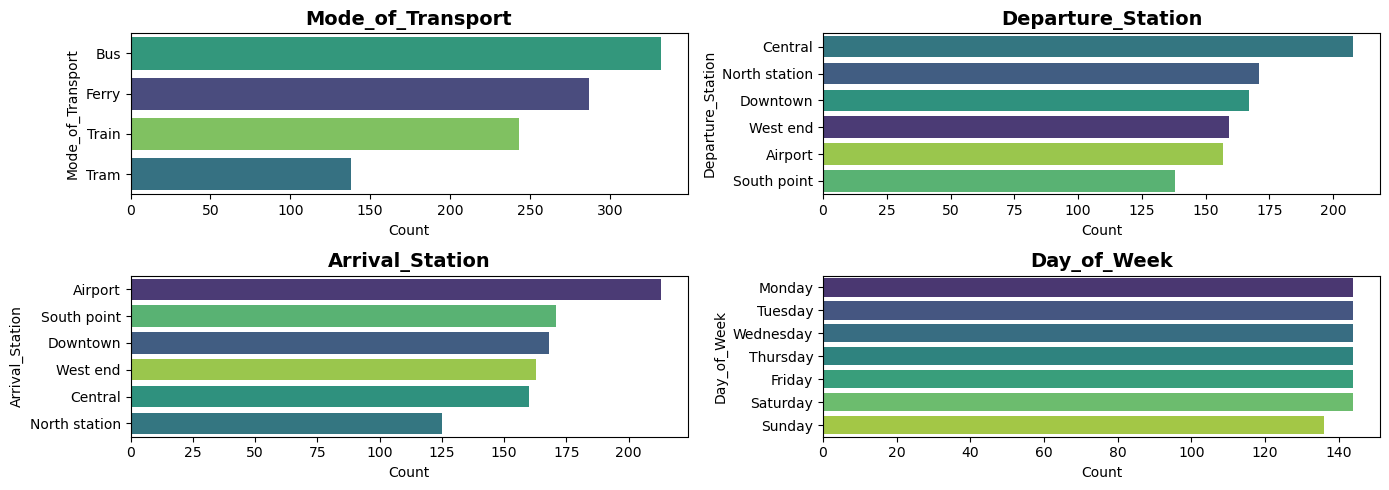

In [59]:
# List of categorical columns
cat_cols = ['Mode_of_Transport', 'Departure_Station', 'Arrival_Station', 'Day_of_Week']

# Set up subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through categorical columns
for i, col in enumerate(cat_cols):
    ax = axes[i]
    sns.countplot(y=data_df[col], order=data_df[col].value_counts().index, ax=ax, hue=data_df[col], palette="viridis", legend=False)
    ax.set_title(f"{col}", fontsize=14, fontweight='bold')
    ax.set_xlabel("Count")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

### INSIGHT:

Bus and Ferry are dominant transport modes. Central station is the main departure hub while Airport is the top arrival destination. Usage is highest on weekdays with Sunday showing lowest activity.

# BIVARIATE ANALYSIS

## Transport Mode Performance

- Transport Mode vs Trip Duration
- Transport Mode vs Fare Amount
- Transport Mode vs Revenue


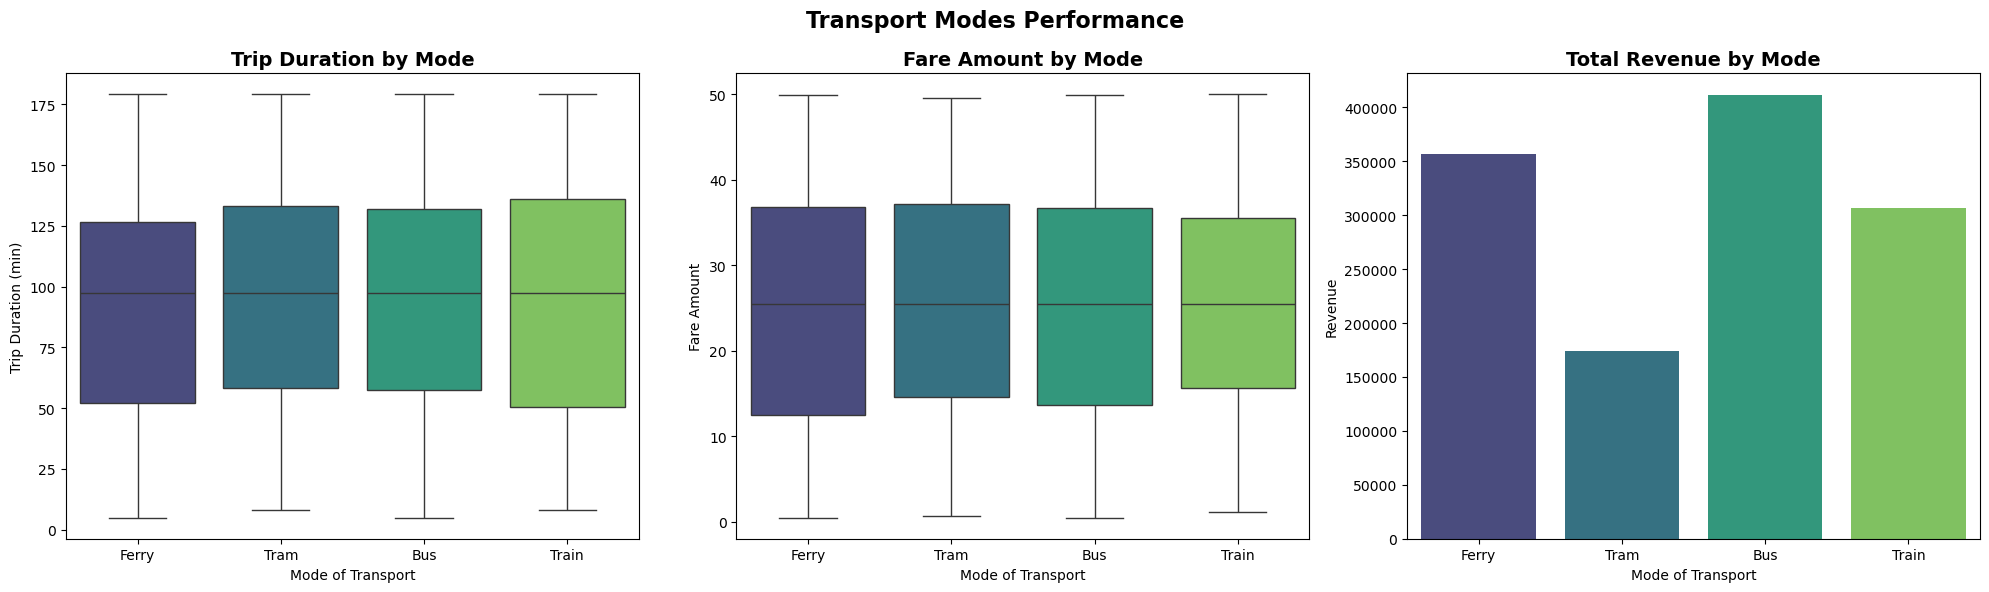

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# a) Mode vs Trip Duration
sns.boxplot(data=data_df, x="Mode_of_Transport", y="Trip_Duration_Minutes", ax=axes[0], palette="viridis",hue= 'Mode_of_Transport')
axes[0].set_title("Trip Duration by Mode", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Mode of Transport")
axes[0].set_ylabel("Trip Duration (min)")

# b) Mode vs Fare Amount
sns.boxplot(data=data_df, x="Mode_of_Transport", y="Fare_Amount", ax=axes[1], palette="viridis",hue= 'Mode_of_Transport')
axes[1].set_title("Fare Amount by Mode", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Mode of Transport")
axes[1].set_ylabel("Fare Amount")

# c) Mode vs Revenue
sns.barplot(data=data_df, x="Mode_of_Transport", y="Revenue", estimator="sum", errorbar=None, ax=axes[2], palette="viridis", hue= 'Mode_of_Transport')
axes[2].set_title("Total Revenue by Mode", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Mode of Transport")
axes[2].set_ylabel("Revenue")

plt.suptitle("Transport Modes Performance", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


### INSIGHT:

Trip Duration: All modes (Ferry, Tram, Bus, Train) have comparable average trip durations (~100 min), with a wide range up to 180 min.

Fare Amount: Median fares are similar across modes (~25 units), suggesting a standardized pricing structure.

Revenue: Buses generate the highest total revenue, followed by Ferries and Trains, while Trams lag significantly.

### RECOMMENDATIONS:

Leverage High-Performing Modes: Prioritize investment in Buses (capacity, scheduling) as they are the strongest revenue drivers.

Optimize Ferry Services: Ferries also contribute strongly to revenue; explore targeted fare adjustments or route optimization.

Reassess Tram Operations: Low revenue contribution suggests underutilization; consider demand analysis, marketing, or service redesign.

Monitor Fare & Duration Consistency: Since all modes show similar fare and duration patterns, performance differences are likely due to usage volume, not pricing—focus on boosting demand.

# Trip Characteristics

- Passenger Count vs Revenue
- Trip Fare by Trip Duration
- Revenue by Trip Duration

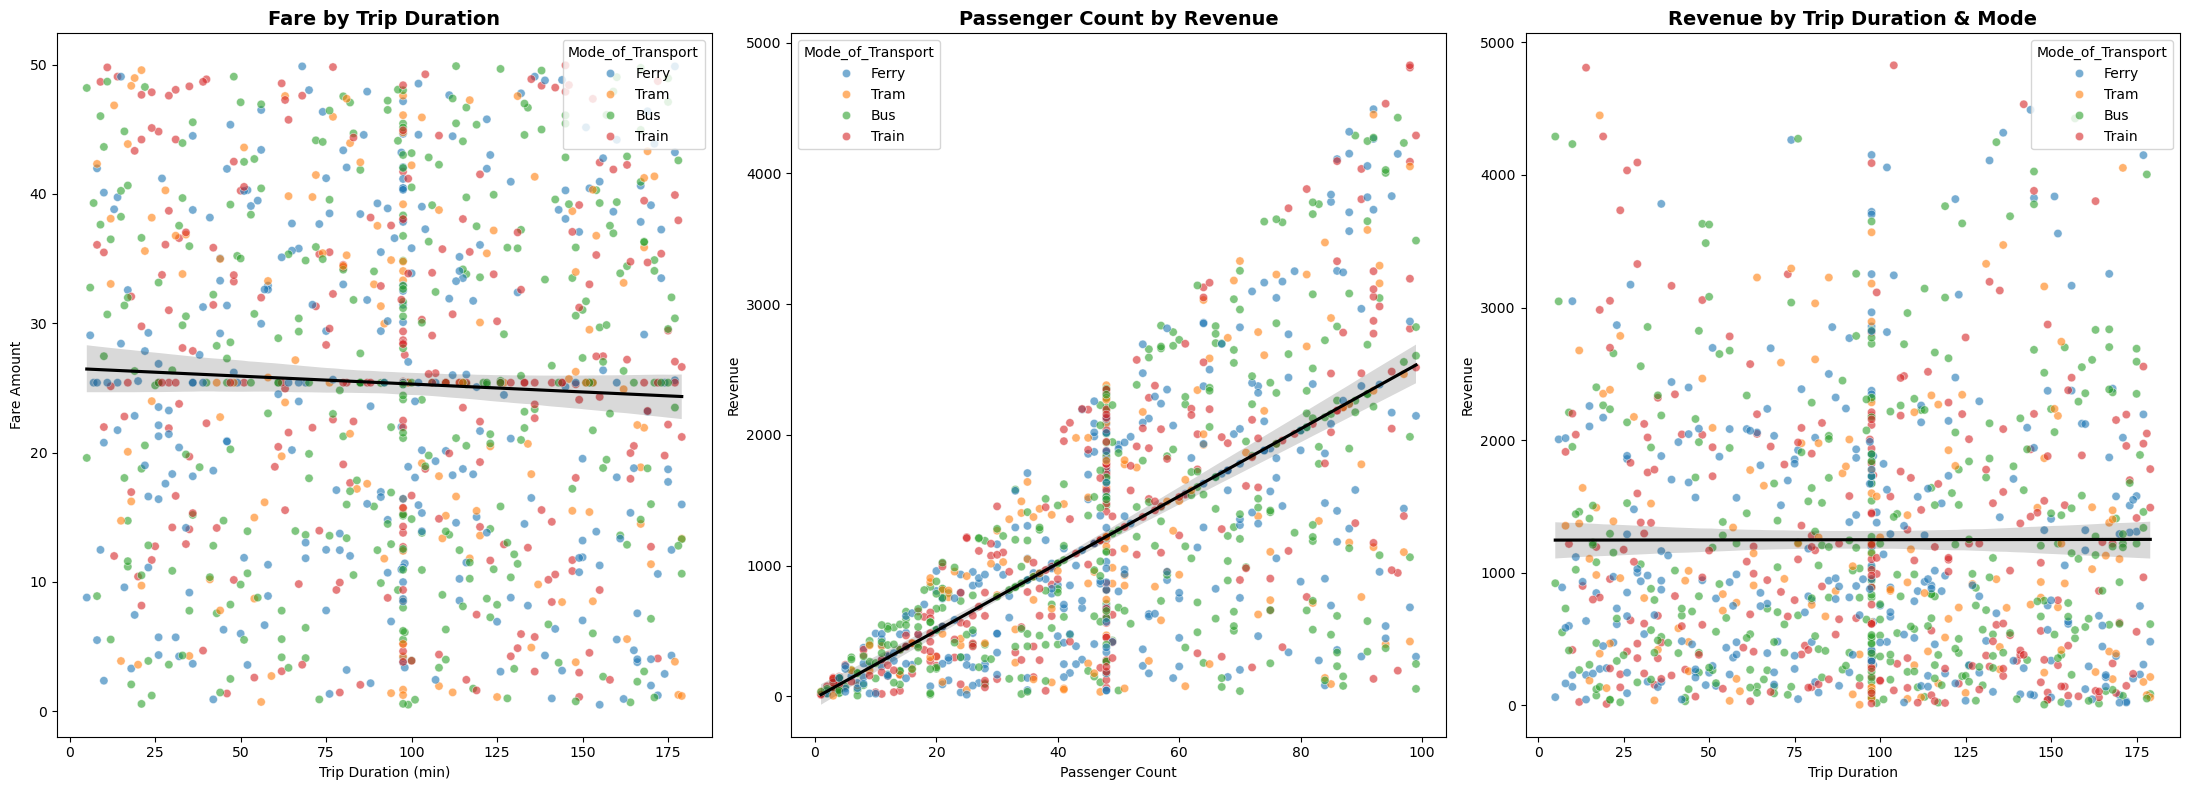

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 8))

# Trip Fare by Duration
sns.scatterplot(data=data_df, x="Trip_Duration_Minutes", y="Fare_Amount", hue="Mode_of_Transport", alpha=0.6, ax=axes[0])
sns.regplot(data=data_df, x="Trip_Duration_Minutes", y="Fare_Amount", scatter=False, color= 'black', ax=axes[0])
axes[0].set_title("Fare by Trip Duration", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Trip Duration (min)")
axes[0].set_ylabel("Fare Amount")

# Passenger Count By Revenue
sns.scatterplot(data=data_df, x="Passenger_Count", y="Revenue", hue="Mode_of_Transport", alpha=0.6, ax=axes[1])
sns.regplot(data=data_df, x="Passenger_Count", y="Revenue", scatter=False, color= 'black',ax=axes[1])
axes[1].set_title("Passenger Count by Revenue", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Passenger Count")
axes[1].set_ylabel("Revenue")

# Revenue by Trip Duration
sns.scatterplot(data=data_df, x="Trip_Duration_Minutes", y="Revenue", hue="Mode_of_Transport", alpha=0.6, ax=axes[2])
sns.regplot(data=data_df, x="Trip_Duration_Minutes", y="Revenue",scatter=False, color= 'black', ax=axes[2])

axes[2].set_title("Revenue by Trip Duration & Mode", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Trip Duration")
axes[2].set_ylabel("Revenue")



plt.tight_layout()
plt.show()


### INSIGHT:

Scatter Plot 1: Fares don’t strongly increase with longer trip durations. In fact, there’s a slight decline, suggesting fares might be fixed or capped beyond a certain time, regardless of how long the journey lasts.

Scatter Plot 2: confirms a strong positive correlation/ linear relationship between passenger count and revenue across all transportation modes, indicating that passenger volume drives more revenue. This suggests pricing is per passenger rather than tied to trip length or time.

Scatter Plot 3: Revenue doesn’t scale with trip duration. A 20-minute trip can bring similar revenue as a 150-minute trip, again reinforcing that passenger count, not duration, drives revenue.

Mode coloring shows similar patterns across all transport types, so this behavior is consistent across ferries, trams, buses, and trains.

The horizontal stripes in fares and revenues indicate a flat fare structure, where multiple trips cluster at fixed price points. 

## Popular routes and stations

- Top 10 Departure Stations by Passenger Volume
- Top 10 Arrival Stations by Passenger Volume
- Route Popularity (Departure → Arrival)

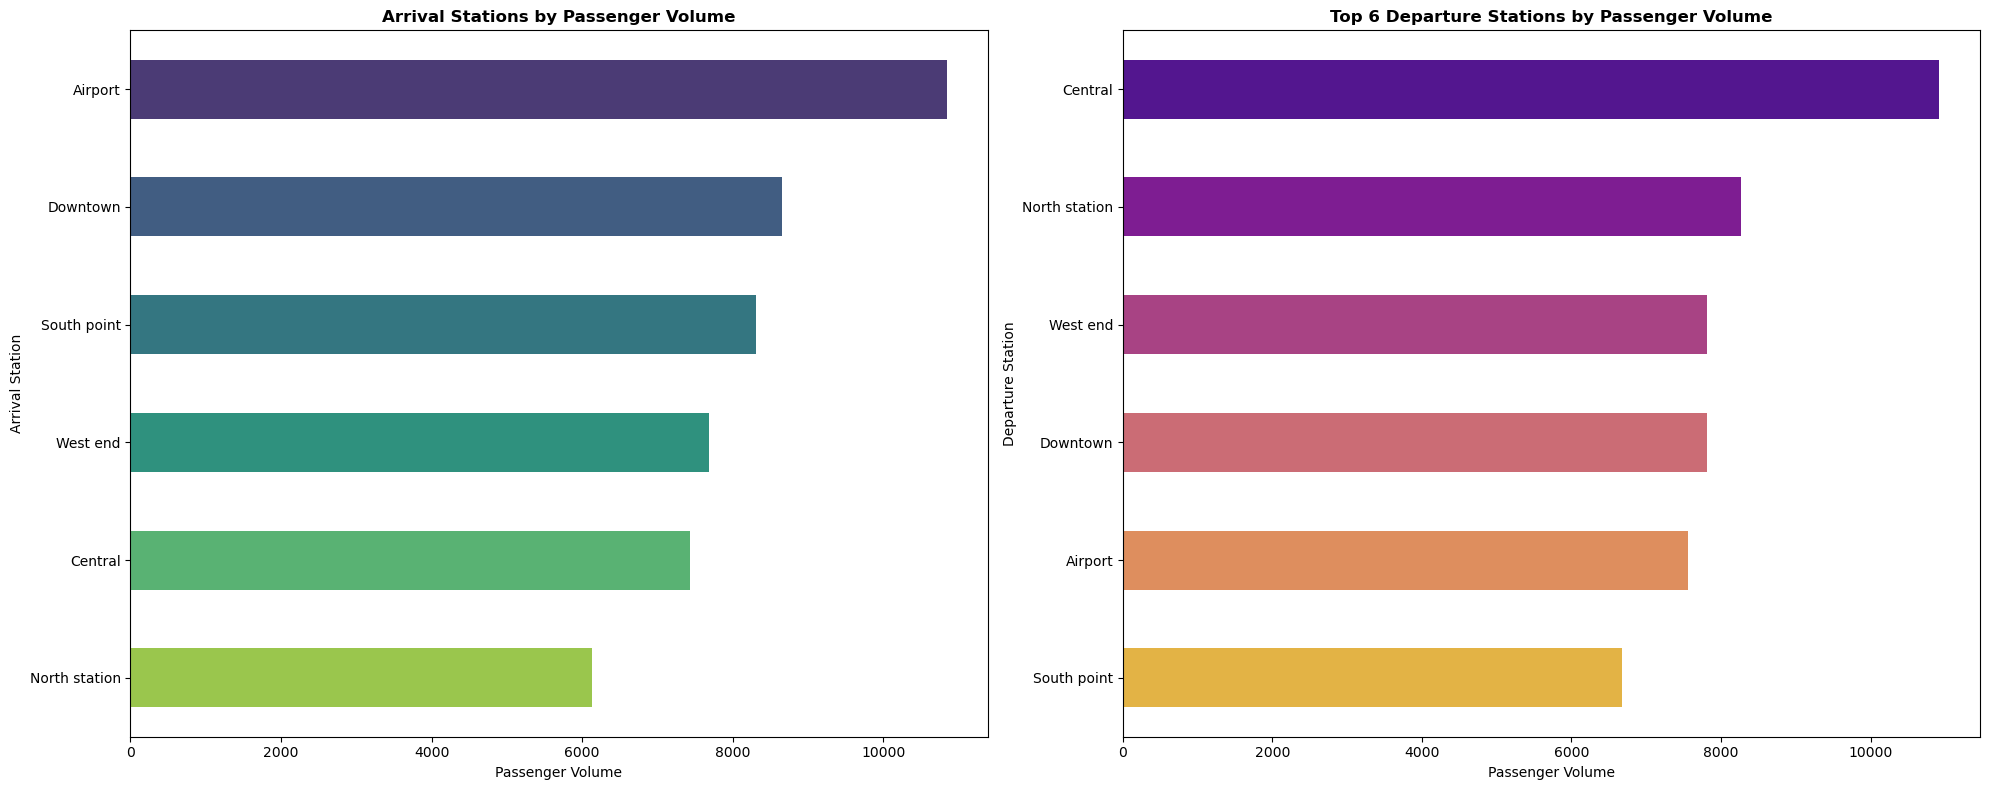

In [62]:
# data preparation
arrival_station = (data_df.groupby("Arrival_Station")["Passenger_Count"].sum()
                  .sort_values(ascending=False).reset_index())
top_departures = (data_df.groupby("Departure_Station")["Passenger_Count"].sum()
                 .sort_values(ascending=False).head(6).reset_index())

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# subplot 1: Arrival stations
sns.barplot(data=arrival_station, y="Arrival_Station", x="Passenger_Count", hue= "Arrival_Station",
            palette="viridis", ax=ax1, width=0.5)
ax1.set_title("Arrival Stations by Passenger Volume", fontsize=12, fontweight="bold")
ax1.set_xlabel("Passenger Volume")
ax1.set_ylabel("Arrival Station")

# subplot 2: Departure stations
sns.barplot(data=top_departures, y="Departure_Station", x="Passenger_Count", hue= "Departure_Station",
            palette="plasma", ax=ax2, width=0.5)
ax2.set_title("Top 6 Departure Stations by Passenger Volume", fontsize=12, fontweight="bold")
ax2.set_xlabel("Passenger Volume")
ax2.set_ylabel("Departure Station")

plt.tight_layout()
plt.show()

### INSIGHTS:

Chart 1: Airport is the dominant arrival destination than all other station, Downtown ranks second while South point, West end, Central and North station have relatively similar volumes.

Chart 2: Central leads as the top departure point, North station and West end follow closely, Downtown and Airport have moderate departure volumes and South point has the lowest departure volume among the top 6 departure stations,

## Route Popularity

- Fare per Passenger by Trip Duration and Mode
- Route Popularity by Passenger Count and mode

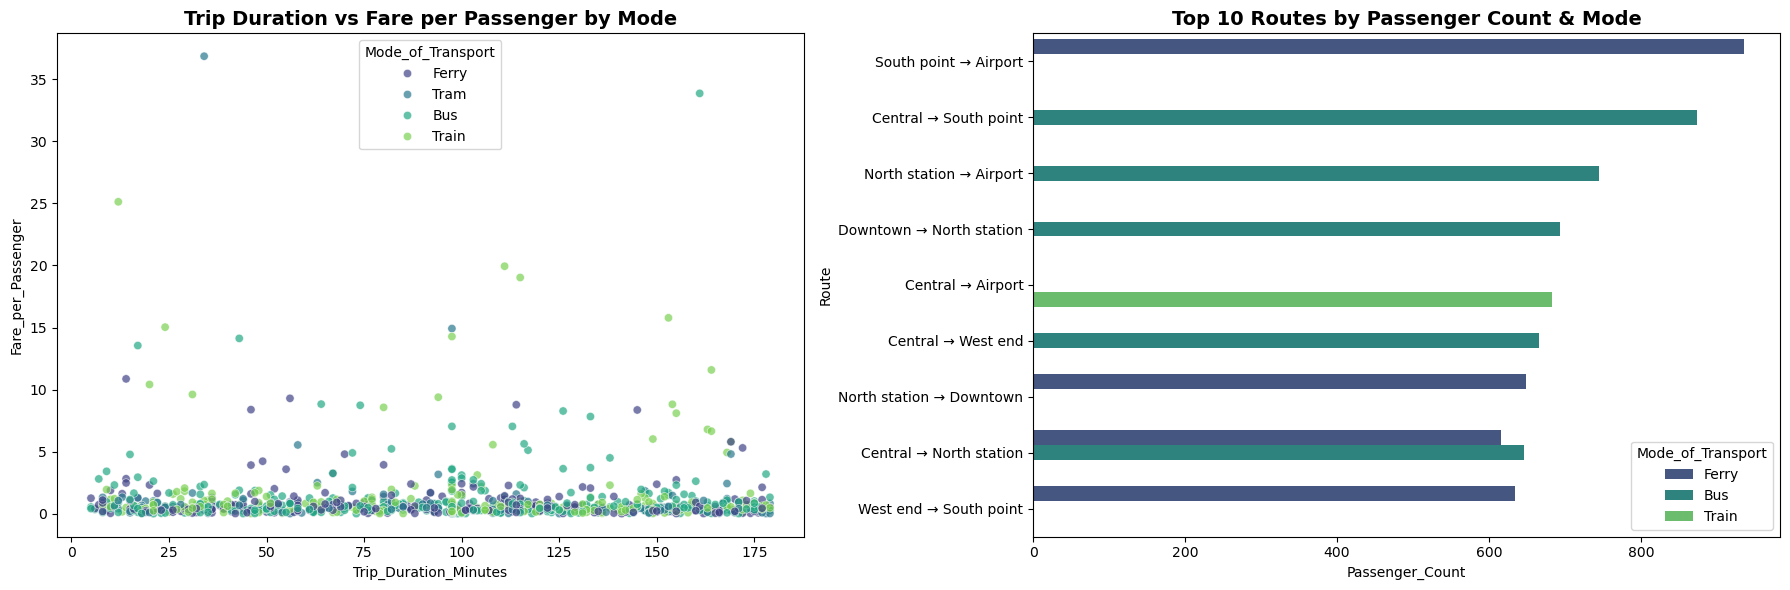

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Fare per Passenger by Trip Duration and Mode
data_df["Fare_per_Passenger"] = data_df["Fare_Amount"] / data_df["Passenger_Count"]

sns.scatterplot(data=data_df, x="Trip_Duration_Minutes", y="Fare_per_Passenger", hue="Mode_of_Transport", ax=axs[0],alpha=0.7,palette="viridis")
axs[0].set_title("Trip Duration vs Fare per Passenger by Mode", fontsize=14, fontweight="bold")

# Route Popularity by Passenger Count and mode
top_routes = (data_df.groupby(["Route", "Mode_of_Transport"])["Passenger_Count"].sum().sort_values(ascending=False).head(10).reset_index())

sns.barplot(data=top_routes, x="Passenger_Count", y="Route", hue="Mode_of_Transport", ax=axs[1],palette="viridis")
axs[1].set_title("Top 10 Routes by Passenger Count & Mode", fontsize=14, fontweight="bold")


plt.tight_layout()
plt.show()


### INSIGHTS:

Chart 1: Across all transport modes, fare per passenger remains clustered at the lower range mostly between 0–5 units regardless of trip duration with few scattered higher fare outliers around 10–35 units.
Again, Trip duration (0–180 minutes) does not show a strong relationship with fare per passenger, fares seem fairly standardized across short and long trips.

Chart 2: The South Point → Airport route (Ferry) has the highest passenger count among all routes. most routes are dominated by Buses. 

# MULTIVARIATE ANALYSIS

In [64]:
numeric_data= data_df.select_dtypes(include='number')

numeric_data

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Revenue,Fare_per_Passenger,Hour_of_Day
0,21.0,4.343642,26.0,91.216483,0.206840,6
1,46.0,20.673380,134.0,950.975482,0.449421,6
2,91.0,25.403856,97.5,2311.750939,0.279163,6
3,27.0,3.767487,97.5,101.722157,0.139537,6
4,66.0,25.403856,97.5,1676.654528,0.384907,6
...,...,...,...,...,...,...
995,48.0,40.546670,51.0,1946.240169,0.844722,22
996,63.0,7.772635,35.0,489.676019,0.123375,22
997,23.0,25.403856,8.0,584.288699,1.104515,22
998,9.0,43.300617,169.0,389.705550,4.811180,22


In [65]:
correlation_map= numeric_data.corr()

correlation_map

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Revenue,Fare_per_Passenger,Hour_of_Day
Passenger_Count,1.000000,0.013301,0.020764,0.657956,-0.440967,-0.007322
Fare_Amount,0.013301,1.000000,-0.042761,0.673827,0.213312,0.008545
Trip_Duration_Minutes,0.020764,-0.042761,1.000000,0.001426,-0.026498,-0.032938
Revenue,0.657956,0.673827,0.001426,1.000000,-0.217384,-0.018945
Fare_per_Passenger,-0.440967,0.213312,-0.026498,-0.217384,1.000000,0.018312
Hour_of_Day,-0.007322,0.008545,-0.032938,-0.018945,0.018312,1.000000


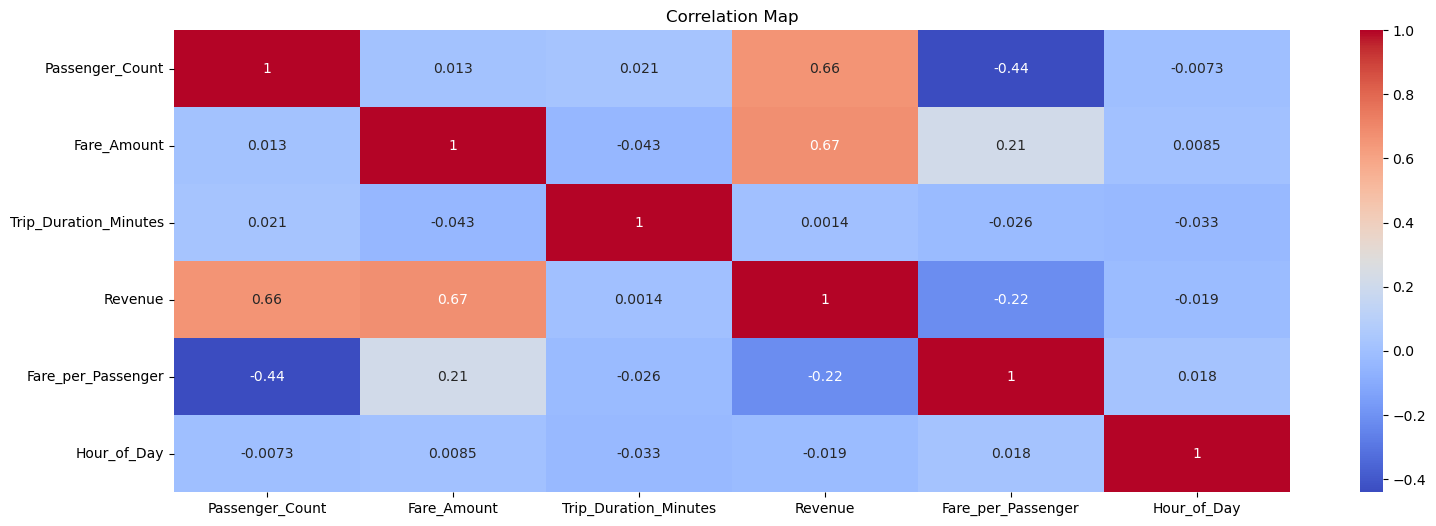

In [66]:
plt.figure(figsize=(18,6))

sns.heatmap(correlation_map, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

### INSIGHTS:

- Revenue correlates moderately with both Passenger_Count (0.66) and Fare_Amount (0.67), indicating that more passengers generally mean higher fares, and higher fares drive revenue.
- Trip_Duration_Minutes shows minimal correlation with other factors, suggesting trip length doesn't strongly predict fare amounts or passenger counts hence minimal impact on revenue.
- Most relationships are weak, indicating consistent demand patterns across different times, suggesting that factors like hour of day, month, and trip duration don't dramatically affect passenger counts, fares, or revenue - meaning demand and pricing remain relatively stable regardless of when trips occur or how long they take.

### RECOMMENDATIONS:

1. Focus on Volume: Since passenger count correlates well with revenue (0.66), prioritizing strategies to increase ridership over premium pricing is encouraged
   
3. Time-Independent Pricing: The weak correlations between time variables and fare/revenue suggest that the current pricing isn't heavily time-dependent. Hence implementing dynamic pricing based on peak hours and seasonal demand patterns is recommended.

4. Trip Duration Management: Since trip duration shows minimal correlation with revenue, focus on efficiency rather than longer trips
